In [2]:
from config import api_key
from yelpapi import YelpAPI
import requests
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
cities = ["Anaheim,CA", "Santa Ana,CA", "Irvine,CA", "Huntington Beach,CA", "Garden Grove,CA", 
          "Orange,CA", "Fullerton,CA", "Costa Mesa,CA", "Mission Viejo,CA", "Westminster,CA"]
types = ["Chinese", "Mexican", "French", "Japanese", "Mediterranean","American", "Italian", 
         "Korean", "Thai", "Indian"]
url = "https://api.yelp.com/v3/businesses/search"
headers = {'Authorization': 'Bearer %s' %api_key}

types_summary = {}
ratings_summary = {}

for city in cities:
    restaurant_types={}
    ratings={}
    restaurant_ratings = {}
    for t in types:
        results = []
        params = {"term":t,"location":city,"limit":50,"radius":5000}
        responses = requests.get(url,headers = headers,params = params).json()
        for response in responses["businesses"]:
            results.append(response)
            
        url_params = {"term":t,"location":city,"limit":50,"offset":50,"radius":5000}
        answers = requests.get(url,headers = headers,params = url_params).json()
        
        for answer in answers["businesses"]:
            results.append(answer)
        for result in results:
            if t not in restaurant_types:
                restaurant_types[t]=1
                ratings[t]=result["rating"]
            else:
                restaurant_types[t]+=1
                ratings[t]+=result["rating"]
    for cuisine in ratings:
        restaurant_ratings[cuisine]=round(ratings[cuisine]/restaurant_types[cuisine],2)
    ratings_summary[city]=restaurant_ratings
    types_summary[city]=restaurant_types

In [4]:
print(types_summary)

{'Anaheim,CA': {'Chinese': 68, 'Mexican': 100, 'French': 17, 'Japanese': 64, 'Mediterranean': 25, 'American': 100, 'Italian': 100, 'Korean': 83, 'Thai': 82, 'Indian': 19}, 'Santa Ana,CA': {'Chinese': 72, 'Mexican': 100, 'French': 11, 'Japanese': 61, 'Mediterranean': 12, 'American': 100, 'Italian': 85, 'Korean': 68, 'Thai': 82, 'Indian': 10}, 'Irvine,CA': {'Chinese': 82, 'Mexican': 100, 'French': 7, 'Japanese': 91, 'Mediterranean': 25, 'American': 95, 'Italian': 68, 'Korean': 100, 'Thai': 87, 'Indian': 16}, 'Huntington Beach,CA': {'Chinese': 43, 'Mexican': 100, 'French': 14, 'Japanese': 50, 'Mediterranean': 12, 'American': 100, 'Italian': 100, 'Korean': 44, 'Thai': 70, 'Indian': 7}, 'Garden Grove,CA': {'Chinese': 100, 'Mexican': 100, 'French': 21, 'Japanese': 100, 'Mediterranean': 26, 'American': 100, 'Italian': 100, 'Korean': 100, 'Thai': 100, 'Indian': 17}, 'Orange,CA': {'Chinese': 55, 'Mexican': 100, 'French': 10, 'Japanese': 58, 'Mediterranean': 20, 'American': 100, 'Italian': 96, '

In [5]:
types_summary_df = pd.DataFrame.from_dict(types_summary)
types_summary_df

,"Anaheim,CA","Costa Mesa,CA","Fullerton,CA","Garden Grove,CA","Huntington Beach,CA","Irvine,CA","Mission Viejo,CA","Orange,CA","Santa Ana,CA","Westminster,CA"
American,100,100,100,100,100,95,88,100,100,100
Chinese,68,59,70,100,43,82,31,55,72,100
French,17,22,8,21,14,7,6,10,11,15
Indian,19,13,13,17,7,16,9,7,10,14
Italian,100,100,100,100,100,68,68,96,85,100
Japanese,64,100,75,100,50,91,36,58,61,100
Korean,83,90,100,100,44,100,40,54,68,100
Mediterranean,25,21,18,26,12,25,15,20,12,18
Mexican,100,100,100,100,100,100,100,100,100,100
Thai,82,85,78,100,70,87,53,66,82,100


In [6]:
print(ratings_summary)

{'Anaheim,CA': {'Chinese': 3.52, 'Mexican': 3.81, 'French': 4.0, 'Japanese': 3.84, 'Mediterranean': 4.02, 'American': 3.99, 'Italian': 3.71, 'Korean': 3.89, 'Thai': 3.83, 'Indian': 3.87}, 'Santa Ana,CA': {'Chinese': 3.56, 'Mexican': 4.11, 'French': 4.0, 'Japanese': 3.62, 'Mediterranean': 4.12, 'American': 3.56, 'Italian': 3.76, 'Korean': 3.71, 'Thai': 3.84, 'Indian': 4.2}, 'Irvine,CA': {'Chinese': 3.45, 'Mexican': 3.69, 'French': 3.86, 'Japanese': 3.62, 'Mediterranean': 3.96, 'American': 3.47, 'Italian': 3.65, 'Korean': 3.67, 'Thai': 3.67, 'Indian': 3.72}, 'Huntington Beach,CA': {'Chinese': 3.64, 'Mexican': 3.84, 'French': 3.93, 'Japanese': 4.0, 'Mediterranean': 4.21, 'American': 3.76, 'Italian': 3.86, 'Korean': 3.93, 'Thai': 4.01, 'Indian': 4.07}, 'Garden Grove,CA': {'Chinese': 3.8, 'Mexican': 3.83, 'French': 3.93, 'Japanese': 3.68, 'Mediterranean': 3.92, 'American': 3.76, 'Italian': 3.63, 'Korean': 3.79, 'Thai': 3.97, 'Indian': 3.91}, 'Orange,CA': {'Chinese': 3.55, 'Mexican': 3.94, '

In [7]:
ratings_summary_df = pd.DataFrame.from_dict(ratings_summary)
ratings_summary_df

,"Anaheim,CA","Costa Mesa,CA","Fullerton,CA","Garden Grove,CA","Huntington Beach,CA","Irvine,CA","Mission Viejo,CA","Orange,CA","Santa Ana,CA","Westminster,CA"
American,3.99,3.81,3.77,3.76,3.76,3.47,3.48,3.74,3.56,3.52
Chinese,3.52,3.68,3.45,3.80,3.64,3.45,3.45,3.55,3.56,3.69
French,4.00,4.00,3.94,3.93,3.93,3.86,4.25,3.95,4.00,4.03
Indian,3.87,4.00,3.73,3.91,4.07,3.72,4.33,4.21,4.20,3.82
Italian,3.71,3.88,3.63,3.63,3.86,3.65,3.63,3.61,3.76,3.67
Japanese,3.84,3.97,3.90,3.68,4.00,3.62,3.74,3.75,3.62,3.78
Korean,3.89,3.84,3.80,3.79,3.93,3.67,3.75,3.82,3.71,3.81
Mediterranean,4.02,4.07,3.97,3.92,4.21,3.96,4.33,4.20,4.12,4.11
Mexican,3.81,3.77,3.73,3.83,3.84,3.69,3.57,3.94,4.11,3.79
Thai,3.83,3.91,3.72,3.97,4.01,3.67,3.82,3.89,3.84,3.92


In [57]:
types_summary_df['Cuisine Average'] = round((types_summary_df.sum(axis=1))/len(types_summary_df.columns))
types_summary_df

,"Anaheim,CA","Costa Mesa,CA","Fullerton,CA","Garden Grove,CA","Huntington Beach,CA","Irvine,CA","Mission Viejo,CA","Orange,CA","Santa Ana,CA","Westminster,CA",Totals,Cuisine Average
American,100,100,100,100,100,95,88,100,100,100,98.0,98.0
Chinese,68,59,70,100,43,82,31,55,72,100,68.0,68.0
French,17,22,8,21,14,7,6,10,11,15,13.0,13.0
Indian,19,13,13,17,7,16,9,7,10,14,13.0,13.0
Italian,100,100,100,100,100,68,68,96,85,100,92.0,92.0
Japanese,64,100,75,100,50,91,36,58,61,100,74.0,74.0
Korean,83,90,100,100,44,100,40,54,68,100,78.0,78.0
Mediterranean,25,21,18,26,12,25,15,20,12,18,19.0,19.0
Mexican,100,100,100,100,100,100,100,100,100,100,100.0,100.0
Thai,82,85,78,100,70,87,53,66,82,100,80.0,80.0


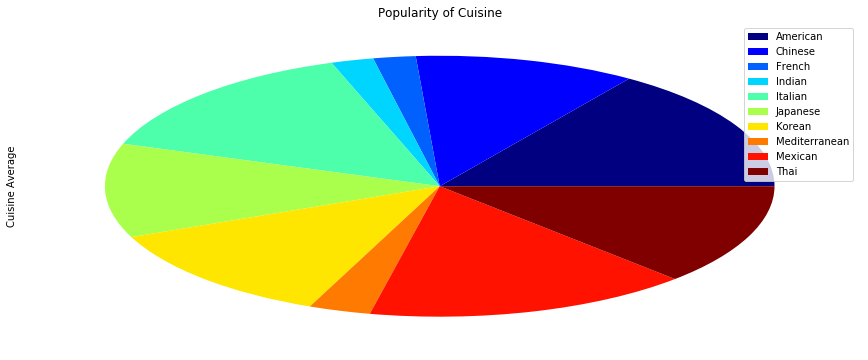

In [65]:
types_summary_df.plot.pie(y='Cuisine Average',figsize=(15, 6), title='Popularity of Cuisine',labels=None,colormap = 'jet')


In [66]:
ratings_summary_df['Average Rating'] = round((ratings_summary_df.sum(axis=1)/len(ratings_summary_df.columns)),2)
ratings_summary_df

,"Anaheim,CA","Costa Mesa,CA","Fullerton,CA","Garden Grove,CA","Huntington Beach,CA","Irvine,CA","Mission Viejo,CA","Orange,CA","Santa Ana,CA","Westminster,CA",Totals,Average Rating
American,3.99,3.81,3.77,3.76,3.76,3.47,3.48,3.74,3.56,3.52,3.69,3.69
Chinese,3.52,3.68,3.45,3.80,3.64,3.45,3.45,3.55,3.56,3.69,3.58,3.58
French,4.00,4.00,3.94,3.93,3.93,3.86,4.25,3.95,4.00,4.03,3.99,3.99
Indian,3.87,4.00,3.73,3.91,4.07,3.72,4.33,4.21,4.20,3.82,3.99,3.99
Italian,3.71,3.88,3.63,3.63,3.86,3.65,3.63,3.61,3.76,3.67,3.71,3.70
Japanese,3.84,3.97,3.90,3.68,4.00,3.62,3.74,3.75,3.62,3.78,3.79,3.79
Korean,3.89,3.84,3.80,3.79,3.93,3.67,3.75,3.82,3.71,3.81,3.80,3.80
Mediterranean,4.02,4.07,3.97,3.92,4.21,3.96,4.33,4.20,4.12,4.11,4.09,4.09
Mexican,3.81,3.77,3.73,3.83,3.84,3.69,3.57,3.94,4.11,3.79,3.81,3.81
Thai,3.83,3.91,3.72,3.97,4.01,3.67,3.82,3.89,3.84,3.92,3.86,3.86


Text(0,0.5,'Average Rating')

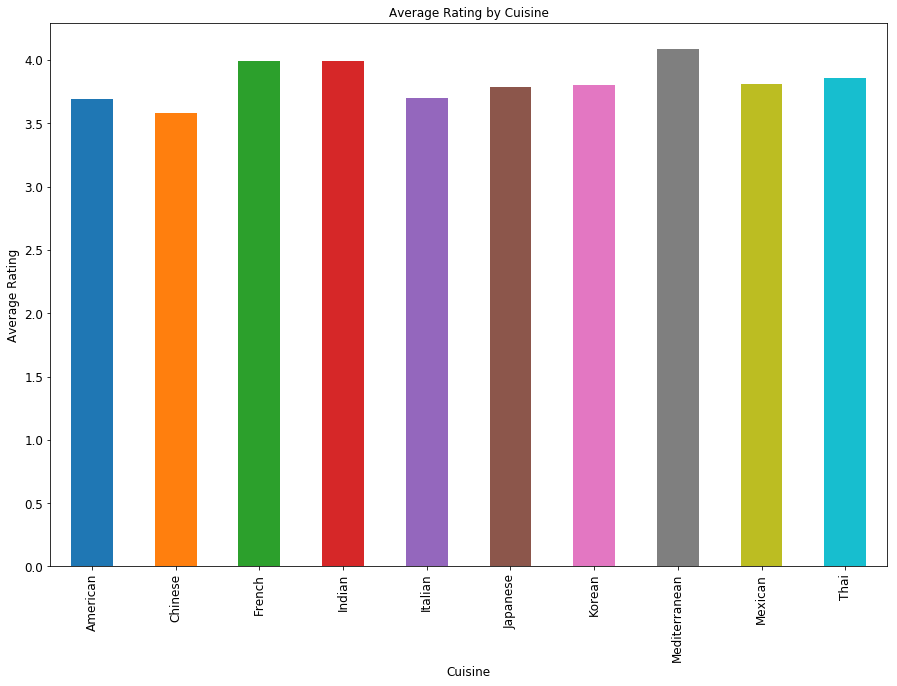

In [69]:
ax = ratings_summary_df['Average Rating'].plot(kind='bar', title ="Average Rating by Cuisine",figsize=(15,10),legend=None, fontsize=12)
ax.set_xlabel("Cuisine",fontsize=12)
ax.set_ylabel("Average Rating",fontsize=12)